## These are the libraries I used.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd

## The algorithm.
As output we can get the responsibility matrix. But I have commented it out and I return just the plot. 

In [2]:
# EM algorithm 
# random initial means
def rand_gaussian_mean(data, k):
    dim = len(data[0,:])
    means = np.empty([k,dim])
    
    for i in range(dim):
        # Picking k random numbers between min and max of each column
        means[:,i] = np.random.uniform(min(data[:,i]), max(data[:,i]), k)
        
    return means

#random initial covariance
def rand_gaussian_cov(data,k):
    dim = len(data[0,:])
    initial_cov = np.empty([k,dim,dim])
    
    # Choosing a random initial diagonal covariance matrix!
    for i in range(k):
        initial_cov[i,:,:] = np.diag(np.random.randint(1,3, dim))
        
    return initial_cov


# random initial weights
def mixing_coefficients(k):
    x = np.random.randint(1,2,k)
    x = x/sum(x)
    
    return x

# gaussian pdf
def multi_gaussian(x,m,c):
    return multivariate_normal.pdf(x,mean = m, cov = c)


# vector tanspose multiplication
def vec_multiplication(x):
    dim = len(x)
    mat = np.empty([dim,dim])
    for i in range(dim):
        mat[i,:] = x[i] * x
    return mat


# data is the data file, k is the number of required clusters.
def EM(file,k):
    
    
    data =  file.to_numpy()
    # Correcting shape for 1-dim arrays:
    if data.shape == (len(data),):
      data = np.reshape(data, (len(data),1))
    else:
      pass
      
    # No. of observations
    observations = len(data)
    
    # Dimension of data
    dim = len(data.T)
   
    # initial mean points
    initial_means = rand_gaussian_mean(data,k)
    #print("initial means:", initial_means, "\n")
   
    # initial covariances( I am taking them to be diagonal!)
    initial_cov = rand_gaussian_cov(data,k)
    #print("initial cov:" , initial_cov, "\n")
    
    # new mean
    means = initial_means
    
    # probabilities with means
    responsibilities = np.empty([observations,k])
    cov = initial_cov
    effective_number_of_points = np.empty(k)
    
    # initial mixture weight
    ini_weight = mixing_coefficients(k)
    weights = ini_weight
    #print(" Initial mixing weights:", weights, "\n")
    
    old_means = np.zeros([k,dim])

    counter = 0
    
    while np.not_equal(old_means,means).any():
        
    #for n in range(500):
      counter = counter +1
        
        # Finding responsibilities! - This is the Expectation step.
      for i in range(observations):
        denominator = 0
        for l in range(k):
          denominator = denominator + weights[l] * multi_gaussian(data[i,:],means[l,:],cov[l,:,:])
        for j in range(k):
          responsibilities[i,j] = ( weights[j] * multi_gaussian(data[i,:],means[j,:],cov[j,:,:]))/denominator
                
        # Finding effective number of points:       
      for i in range(k):
         effective_number_of_points[i] = np.sum(responsibilities[:,i])
            
            
      old_means = np.copy(means)
      
        
        #Finding new parameters. - The Maximization step!
        
        # finding new mean:
      for i in range(k):
        mu = np.zeros(dim)
        for j in range(observations):
           mu = mu + (responsibilities[j,i] * data[j,:])
           means[i,:] = mu/(effective_number_of_points[i])
            
            
        # finding new covariance matrix:
      for i in range(k):
        new_cov = np.zeros([dim,dim])
        for j in range(observations):
          new_cov = new_cov + responsibilities[j,i]* vec_multiplication(data[j,:]-means[i,:])
          cov[i,:,:] = new_cov/(effective_number_of_points[i])
            
            
        # find new weights:
      for i in range(k):
        weights[i] = effective_number_of_points[i]/observations

    # Identifying which cluster the data point belongs!
    cluster = np.empty(observations)
    for i in range(observations):
      cluster[i] = np.argmax(responsibilities[i,:])

    # Selecting random colour parameters for plotting. 
    colour = np.empty([k,3])
    for i in range(k):
        colour[i,:] = np.random.rand(3) 

    if k == 2:
        colour = ['g','r']
    else:
        pass

    # Plotting graph for datas with two dimension. 
    if dim == 2:
        plt.figure()
        plt.xlabel(file.columns[0])
        plt.ylabel(file.columns[1])
        for i in range(observations):
            plt.scatter(data[i,1],data[i,0], color = colour[int(cluster[i])])
            #plt.xaxis = (file.columns[0])
            #plt.yaxis = (file.columns[1])
        for i in range(k):
            plt.scatter(means[i,0],means[i,1], marker = "+" , color = colour[i])
    else:
        pass

    print("Iterations:", counter,"\n")
    #print("old means:", old_means,"\n")
    print("Controid/Means:", means,"\n")
    #print("While loop condition", np.not_equal(old_means, means).any(), "\n")
    return 


### Loading the Iris data set and running the algorithm.

Iterations: 16 

Controid/Means: [[3.41805831 1.46400848]
 [2.87198518 4.90590537]] 



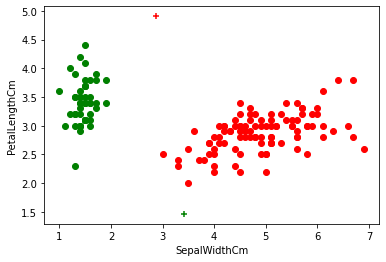

In [3]:
iris_data = pd.read_csv('Iris.csv')
iris = iris_data[['SepalWidthCm','PetalLengthCm']]
EM(iris,2)

In the results, the Green sets and the Red sets are the different data sets. 

### Loading the Indian liver patient dataset and running the algorithm. 


Iterations: 256 

Controid/Means: [[0.81625026 3.35531796]
 [6.60578418 2.85749674]] 



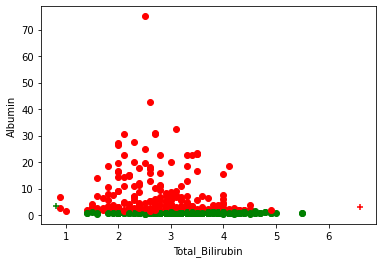

In [7]:
liver_data = pd.read_csv('indian_liver_patient.csv')
liver = liver_data[['Total_Bilirubin','Albumin']]
EM(liver,2)

The Red dots represent patients with Liver disease and the Green dots represents the patients without Liver disease.